<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/0_LinearRegression_MooresLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 63kB/s 
     |████████████████████████████████| 501kB 44.5MB/s 
     |████████████████████████████████| 3.1MB 51.1MB/s 


In [0]:
# Importing the Libraries

import numpy as np
import pandas as pd
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
# Get the Data

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-01-16 14:29:00--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-01-16 14:29:00 (52.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
# Load in the Data

data = pd.read_csv('moore.csv', header=None, engine='python')

In [0]:
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [0]:
# Reshaping the Data
X = data[0].values.reshape(-1,1) # Making it 2D array of N*D where D=1
y = data[1].values

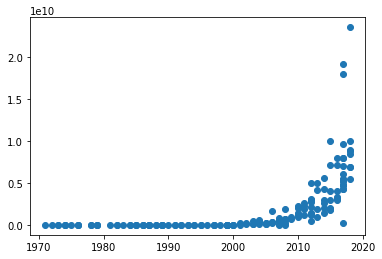

In [0]:
# Plotting the Data to See Exponential Trend

import matplotlib.pyplot as plt

plt.scatter(X,y)

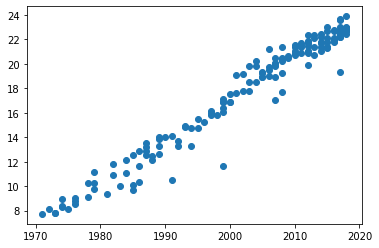

In [0]:
# As we Need Linear Model, we take Log
y = np.log(y)
plt.scatter(X,y)

In [0]:
#Center the X value data as the Values arent too large
X = X-X.mean()

In [0]:
# Create a Tensorflow Model
'''
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])
'''
# As We get Model Load Error, we follow the below

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (1,), activation=None))

In [0]:
# Compiling the Model
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

In [0]:
# Create a Learning Rate Scheduler

def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [0]:
# Assign Scheduler
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [0]:
# Train the Model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 260us/sample - loss: 324.0058
Epoch 2/200
162/162 [==============================] - 0s 63us/sample - loss: 285.2695
Epoch 3/200
162/162 [==============================] - 0s 59us/sample - loss: 260.9712
Epoch 4/200
162/162 [==============================] - 0s 55us/sample - loss: 191.3472
Epoch 5/200
162/162 [==============================] - 0s 55us/sample - loss: 172.9737
Epoch 6/200
162/162 [==============================] - 0s 54us/sample - loss: 135.6870
Epoch 7/200
162/162 [==============================] - 0s 60us/sample - loss: 157.1341
Epoch 8/200
162/162 [==============================] - 0s 65us/sample - loss: 93.1072
Epoch 9/200
162/162 [==============================] - 0s 61us/sample - loss: 57.9357
Epoch 10/200
162/162 [==============================] - 0s 62us/sample - loss: 39.9507
Epoch 11/200
162/162 [==============================] - 0s 65us/sample - loss: 26.8002
Epoch 12/200
162/162 [=

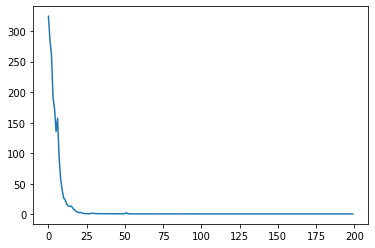

In [0]:
# Plot Loss

plt.plot(r.history['loss'], label="loss")

In [0]:
# Get the Slope of the Line

print(model.layers) # Note: The Input Layer doesn't Count, Only Dense Layer 
print(model.layers[0].get_weights()) # wx+b

[array([[0.3342961]], dtype=float32), array([17.772099], dtype=float32)]


In [0]:
# The Slope of the Line is
a = model.layers[0].get_weights()[0][0,0]

In [0]:
# We Follow Exponential Growth Pattern: C = A0*rEt => log C = log r *t + log A0

In [0]:
print("Time to Double is:", np.log(2)/a) # Based on the Obtained Calculations

Time to Double is: 2.073452742762971


In [0]:
# The Above Result: 2 Years Proves Moore's Law (Transistors)

**Making Predictions**

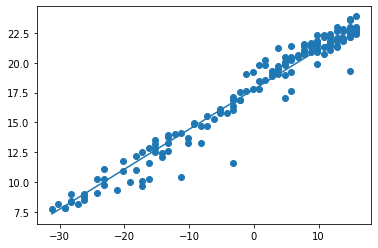

In [0]:
# Making Sure Line fits Model
y_pred = model.predict(X).flatten()
plt.scatter(X,y)
plt.plot(X, y_pred)

In [0]:
# Manual Calculation

# Get Weights
w,b = model.layers[0].get_weights()

# Reshape X as we flattened it again earlier
X = X.reshape(-1,1)

# n*1 dot 1* 1 gives n*1 matrix
y_pred2 = (X.dot(w) + b).flatten()

# Verify for Floating Points
np.allclose(y_pred, y_pred2)

# The Above Checks if Manual calculation and Tensorflow Calculation are the Same

True

**Saving the Model**

In [0]:
# Saving as h5 file

model.save('0_linear_Regression.h5')

In [0]:
# Check the existence of model file
!ls -lh

total 68K
-rw-r--r-- 1 root root  18K Jan 16 14:55 0_linear_Classification.h5
-rw-r--r-- 1 root root  18K Jan 16 14:57 0_linear_Regression.h5
-rw-r--r-- 1 root root  18K Jan 16 14:57 0_logistic_Regression.h5
-rw-r--r-- 1 root root 2.3K Jan 16 14:29 moore.csv
drwxr-xr-x 1 root root 4.0K Jan 13 16:38 sample_data


In [0]:
# We need to load the model by changing the Model creation by removing Explicit Input function

# Loading the Model

model = tf.keras.models.load_model('0_linear_Regression.h5')

In [0]:
# Verifying the Loaded Weights
print(model.layers)
model.evaluate(X, y)

162/162 [==============================] - 0s 126us/sample - loss: 0.8805


0.8804524342219034

In [0]:
# To Download a file from Colab, rather than clicking top left ">"

from google.colab import files
files.download('0_linear_Regression.h5')